In [1]:
from Functions import *
from Permutation import *
from VariableStructureGAM import *
from VariableSelctionMI import *
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 1000)

### Experiment 1
In this case, we want to test MI gain of independent continous variables $(X,Y) \in N(0, 1)$  
We use different methods: `equal frequency, equal width`

__Equal frequency__

In [2]:
col_dict = dict(zip(['fraction_of_MI', 'reliable_fraction_of_MI'], [[0 for _ in range(201)] for _ in range(2)]))
df_ex1_freq = pd.DataFrame(col_dict)
rep = 1
for i in range(rep):
    mu, sigma = 0, 1 # mean and standard deviation
    x = np.random.normal(mu, sigma, 200)
    #y_1 = [0 for _ in range(100)]
    #y_2 = [1 for _ in range(100)]
    #y = np.array(y_1 + y_2)
    y = np.random.normal(mu, sigma, 200)
    for each in range(0, 200+1):
        # variable selection
        bin_indi_variables, bin_multi_variables = VariableSelectionMI(estimator = naive_estimate, 
                                                                      x = x, 
                                                                      y = y, 
                                                                      column_names = ['x'],
                                                                      bin_type = 'freq',
                                                                      xbin=True,
                                                                      x_bin = each,
                                                                      ybin=False).summary()
        df_ex1_freq.loc[each, 'fraction_of_MI'] += bin_indi_variables[0][0]/rep
        
        bin_indi_variables, bin_multi_variables = VariableSelectionMI(estimator = naive_estimate, 
                                                                      x = x, 
                                                                      y = y, 
                                                                      column_names = ['x'],
                                                                      bin_type = 'freq',
                                                                      xbin=True,
                                                                      x_bin = each,
                                                                      ybin=False,
                                                                      permut=True).summary()
        df_ex1_freq.loc[each, 'reliable_fraction_of_MI'] += bin_indi_variables[0][0]/rep

Text(0, 0.5, 'MI Gain')

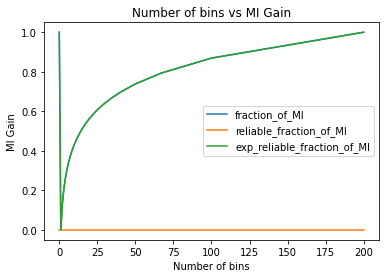

In [4]:
df_ex1_freq['exp_reliable_fraction_of_MI'] = df_ex1_freq['fraction_of_MI'] - df_ex1_freq['reliable_fraction_of_MI']
ax = df_ex1_freq.plot(title='Number of bins vs MI Gain')
ax.set_xlabel("Number of bins")
ax.set_ylabel('MI Gain')

<AxesSubplot:>

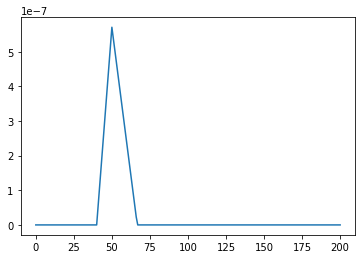

In [5]:
df_ex1_freq['reliable_fraction_of_MI'].plot()

In [6]:
df_ex1_freq

,fraction_of_MI,reliable_fraction_of_MI,exp_reliable_fraction_of_MI
0,1.000000,-6.681322e-13,1.000000
1,0.000000,0.000000e+00,0.000000
2,0.130824,1.332268e-15,0.130824
3,0.207346,3.885781e-16,0.207346
4,0.261648,4.107825e-15,0.261648
5,0.303764,-3.941292e-15,0.303764
6,0.338156,-3.885781e-16,0.338156
7,0.367241,9.159340e-15,0.367241
8,0.392472,-8.659740e-15,0.392472
9,0.414670,7.494005e-15,0.414670


__Equal width__

In [20]:
col_dict = dict(zip(['fraction_of_MI', 'reliable_fraction_of_MI'], [[0 for _ in range(500)] for _ in range(2)]))
df_ex1_width = pd.DataFrame(col_dict)
rep=1
for i in range(rep):
    mu, sigma = 0, 1 # mean and standard deviation
    x = np.random.normal(mu, sigma, 200)
    y = np.random.normal(mu, sigma, 200)
    for each in range(0, 500):
        # variable selection
        bin_indi_variables, bin_multi_variables = VariableSelectionMI(estimator = naive_estimate, 
                                                                      x = x, 
                                                                      y = y, 
                                                                      column_names = ['x'],
                                                                      bin_type = 'width',
                                                                      xbin=True,
                                                                      x_bin = each,
                                                                      ybin=False).summary()
        df_ex1_width.loc[each, 'fraction_of_MI'] += bin_indi_variables[0][0]/rep
        
        bin_indi_variables, bin_multi_variables = VariableSelectionMI(estimator = naive_estimate, 
                                                                      x = x, 
                                                                      y = y, 
                                                                      column_names = ['x'],
                                                                      bin_type = 'width',
                                                                      xbin=True,
                                                                      x_bin = each,
                                                                      ybin=False, 
                                                                      permut=True).summary()
        df_ex1_width.loc[each, 'reliable_fraction_of_MI'] += bin_indi_variables[0][0]/rep

Text(0, 0.5, 'MI Gain')

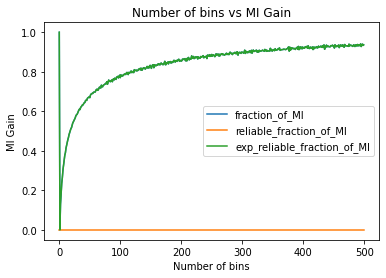

In [21]:
df_ex1_width['exp_reliable_fraction_of_MI'] = df_ex1_width['fraction_of_MI'] - df_ex1_width['reliable_fraction_of_MI']
ax = df_ex1_width.plot(title='Number of bins vs MI Gain')
ax.set_xlabel("Number of bins")
ax.set_ylabel("MI Gain")

In [22]:
df_ex1_width

,fraction_of_MI,reliable_fraction_of_MI,exp_reliable_fraction_of_MI
0,1.000000,-6.681322e-13,1.000000
1,0.000000,0.000000e+00,0.000000
2,0.130673,-3.330669e-16,0.130673
3,0.185201,-1.193490e-15,0.185201
4,0.235746,-1.193490e-15,0.235746
5,0.264633,1.121325e-14,0.264633
6,0.303094,2.886580e-15,0.303094
7,0.328273,1.141459e-08,0.328273
8,0.355342,-5.162537e-15,0.355342
9,0.377350,-3.441691e-15,0.377350


### Experiment 2
In this case, we want to test MI gain of dependent continous variables $(X,Y) \in N(0, 1)$  
We set
$$ y_i=\left\{\begin{array}{ll}
1 & \text { for } x_i \leq 0 \\
0 & \text { otherwise }
\end{array}\right.$$

Similarly, We use different methods: `equal frequency, equal width`  

__Equal frequency__

In [39]:
col_dict = dict(zip(['fraction_of_MI', 'reliable_fraction_of_MI'], [[0 for _ in range(201)] for _ in range(2)]))
df_ex2_freq = pd.DataFrame(col_dict)
rep = 20
for i in range(rep):
    mu, sigma = 0, 1 # mean and standard deviation
    x = np.random.normal(mu, sigma, 200)
    x = abs(x)
    for i in range(len(x)):
        if i < len(x)/2:
            x[i] = -1 * x[i]
    y = []
    for each in x:
        if each <= 0:
            res = 1
        else:
            res = 0
        y.append(res)
    y = np.array(y)
    for each in range(0, 201):
        # variable selection
        bin_indi_variables, bin_multi_variables = VariableSelectionMI(estimator = naive_estimate, 
                                                                      x = x, 
                                                                      y = y, 
                                                                      column_names = ['x'],
                                                                      bin_type = 'freq',
                                                                      xbin=True,
                                                                      x_bin = each,
                                                                      ybin=False).summary()
        df_ex2_freq.loc[each, 'fraction_of_MI'] += bin_indi_variables[0][0]/rep
        
        bin_indi_variables, bin_multi_variables = VariableSelectionMI(estimator = naive_estimate, 
                                                                      x = x, 
                                                                      y = y, 
                                                                      column_names = ['x'],
                                                                      bin_type = 'freq',
                                                                      xbin=True,
                                                                      x_bin = each,
                                                                      ybin=False, permut=True).summary()
        df_ex2_freq.loc[each, 'reliable_fraction_of_MI'] += bin_indi_variables[0][0]/rep

Text(0, 0.5, 'MI Gain')

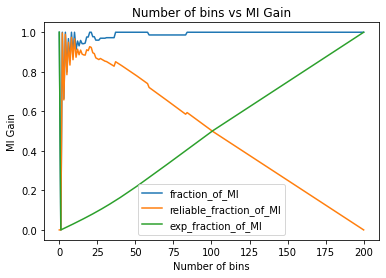

In [40]:
df_ex2_freq['exp_fraction_of_MI'] = df_ex2_freq['fraction_of_MI'] - df_ex2_freq['reliable_fraction_of_MI']
ax = df_ex2_freq.plot(title='Number of bins vs MI Gain')
ax.set_xlabel("Number of bins")
ax.set_ylabel("MI Gain")

In [41]:
df_ex2_freq

,fraction_of_MI,reliable_fraction_of_MI,exp_fraction_of_MI
0,1.000000,1.032507e-14,1.000000
1,0.000000,0.000000e+00,0.000000
2,1.000000,9.963660e-01,0.003634
3,0.665054,6.577671e-01,0.007287
4,1.000000,9.890415e-01,0.010958
5,0.800000,7.853503e-01,0.014650
6,0.967675,9.493140e-01,0.018361
7,0.856121,8.340287e-01,0.022093
8,1.000000,9.741549e-01,0.025845
9,0.890657,8.610371e-01,0.029620


__Equal width__

In [26]:
col_dict = dict(zip(['fraction_of_MI', 'reliable_fraction_of_MI'], [[0 for _ in range(500)] for _ in range(2)]))
df_ex2_width = pd.DataFrame(col_dict)
rep = 1
for i in range(rep):
    mu, sigma = 0, 1 # mean and standard deviation
    x = np.random.normal(mu, sigma, 200)
    y = []
    for each in x:
        if each <= 0:
            res = each*2
        else:
            res = each**2
        y.append(res)
    y = np.array(y)
    for each in range(0, 500):
        # variable selection
        bin_indi_variables, bin_multi_variables = VariableSelectionMI(estimator = naive_estimate, 
                                                                      x = x, 
                                                                      y = y, 
                                                                      column_names = ['x'],
                                                                      bin_type = 'width',
                                                                      xbin=True,
                                                                      x_bin = each,
                                                                      ybin=False).summary()
        df_ex2_width.loc[each, 'fraction_of_MI'] += bin_indi_variables[0][0]/rep
        
        bin_indi_variables, bin_multi_variables = VariableSelectionMI(estimator = naive_estimate, 
                                                                      x = x, 
                                                                      y = y, 
                                                                      column_names = ['x'],
                                                                      bin_type = 'width',
                                                                      xbin=True,
                                                                      x_bin = each,
                                                                      ybin=False, permut=True).summary()
        df_ex2_width.loc[each, 'reliable_fraction_of_MI'] += bin_indi_variables[0][0]/rep

Text(0, 0.5, 'MI Gain')

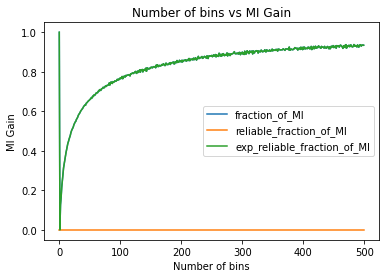

In [27]:
df_ex2_width['exp_reliable_fraction_of_MI'] = df_ex2_width['fraction_of_MI'] - df_ex2_width['reliable_fraction_of_MI']
ax = df_ex2_width.plot(title='Number of bins vs MI Gain')
ax.set_xlabel("Number of bins")
ax.set_ylabel("MI Gain")

In [28]:
df_ex2_width

,fraction_of_MI,reliable_fraction_of_MI,exp_reliable_fraction_of_MI
0,1.000000,-6.681322e-13,1.000000
1,0.000000,0.000000e+00,0.000000
2,0.127024,-1.110223e-16,0.127024
3,0.164741,-2.775558e-17,0.164741
4,0.215604,-3.635980e-15,0.215604
5,0.249007,-6.383782e-16,0.249007
6,0.278109,-4.662937e-15,0.278109
7,0.314062,8.659740e-15,0.314062
8,0.333390,7.049916e-15,0.333390
9,0.350541,2.282917e-08,0.350541
